In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
with open('nvBench/nvBench_VegaLite/VIS_1.html', 'r') as f:
    html_string = f.read()

# use pandas to read the HTML table into a list of DataFrames
dfs = pd.read_html(html_string)


In [6]:
# extract the first DataFrame (assuming there is only one table in the HTML file)
df = dfs[1]

# print the resulting DataFrame
df

,Document_ID,Location_Code,Date_in_Location_From,Date_in_Locaton_To
0,7,e,2017-01-06 23:17:22,2008-06-08 12:45:38
1,11,x,2017-01-06 23:17:22,2012-07-03 09:48:46
2,81,c,1972-03-31 09:47:22,1987-11-05 06:11:22
3,81,c,2017-01-06 23:17:22,2010-11-26 19:22:50
4,81,x,2008-06-08 12:45:38,1976-06-15 03:40:06
5,111,x,1986-10-14 17:53:39,2010-11-26 19:22:50
6,119,b,2017-01-06 23:17:22,1995-01-01 03:52:11
7,166,b,1985-05-13 12:19:43,1986-10-14 17:53:39
8,166,b,1986-10-14 17:53:39,2010-11-26 19:22:50
9,170,x,1997-03-10 15:24:00,1976-06-15 03:40:06


In [39]:
import datamart_profiler

metadata = datamart_profiler.process_dataset(df)


In [27]:
test = str(df.iloc[0,1])
test

'NL Queries: Bar chart x axis date in location from y axis the number of date in location from, and order by the total number in desc please.Show the number of documents in different starting date and bin starting date by weekday interval with a bar chart, and rank y axis in desc order please.How many documents in different starting date? Return a bar chart binning starting date by weekday interval, I want to sort y-axis in descending order.VIS Query: Visualize BAR SELECT Date_in_Location_From , COUNT(Date_in_Location_From) FROM Document_locations ORDER BY COUNT(Date_in_Location_From) DESC BIN Date_in_Location_From BY WEEKDAY'

In [28]:
import re

split_string = re.split('[:.?]', test)

# print the array
print(split_string)

['NL Queries', ' Bar chart x axis date in location from y axis the number of date in location from, and order by the total number in desc please', 'Show the number of documents in different starting date and bin starting date by weekday interval with a bar chart, and rank y axis in desc order please', 'How many documents in different starting date', ' Return a bar chart binning starting date by weekday interval, I want to sort y-axis in descending order', 'VIS Query', ' Visualize BAR SELECT Date_in_Location_From , COUNT(Date_in_Location_From) FROM Document_locations ORDER BY COUNT(Date_in_Location_From) DESC BIN Date_in_Location_From BY WEEKDAY']


In [30]:
split_string[1]

' Bar chart x axis date in location from y axis the number of date in location from, and order by the total number in desc please'

In [31]:
from bs4 import BeautifulSoup

# Open the HTML file and read its contents
with open('nvBench/nvBench_VegaLite/VIS_1.html', 'r') as file:
    html = file.read()

# Create a BeautifulSoup object to parse the HTML
soup = BeautifulSoup(html, 'html.parser')

# Find all <li> tags and extract their contents into a list
li_list = [li.string for li in soup.find_all('li')]

# Print the list of <li> contents
print(li_list)


['Bar chart x axis date in location from y axis the number of date in location from, and order by the total number in desc please.', 'Show the number of documents in different starting date and bin starting date by weekday interval with a bar chart, and rank y axis in desc order please.', 'How many documents in different starting date? Return a bar chart binning starting date by weekday interval, I want to sort y-axis in descending order.']


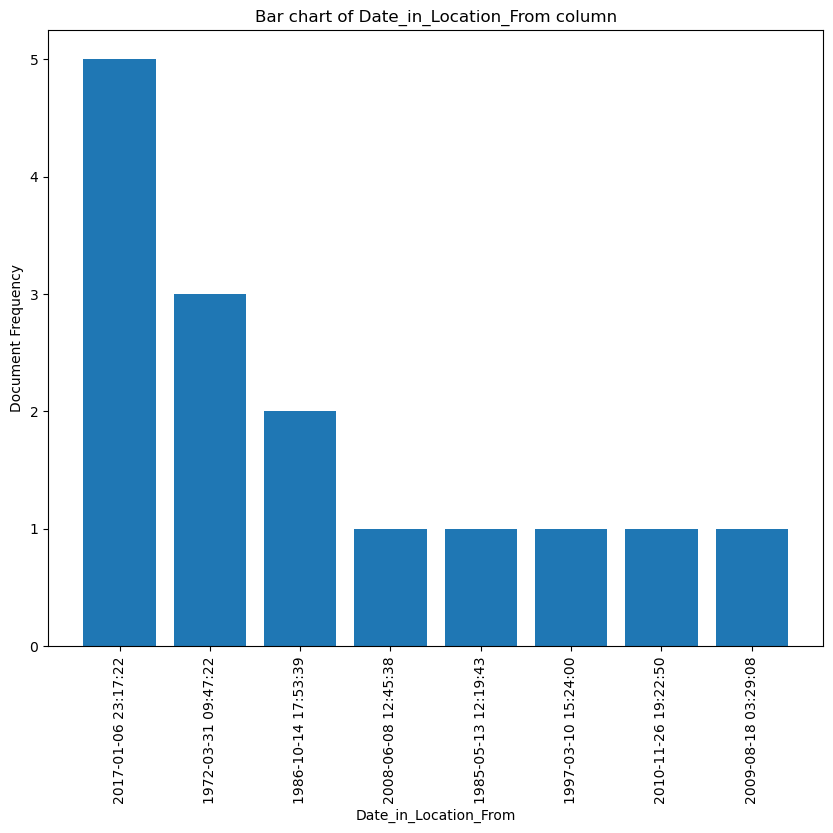

In [1]:
## test 1
import pandas as pd
import matplotlib.pyplot as plt

data = {'Document_ID': [7, 11, 81, 81, 81, 111, 119, 166, 166, 170, 230, 230,
                         252, 252, 260],
        'Location_Code': ['e', 'x', 'c', 'c', 'x', 'x', 'b', 'b', 'b', 'x', 'e',
                          'e', 'n', 'x', 'e'],
        'Date_in_Location_From': ['2017-01-06 23:17:22', '2017-01-06 23:17:22',
                                   '1972-03-31 09:47:22', '2017-01-06 23:17:22',
                                   '2008-06-08 12:45:38', '1986-10-14 17:53:39',
                                   '2017-01-06 23:17:22', '1985-05-13 12:19:43',
                                   '1986-10-14 17:53:39', '1997-03-10 15:24:00',
                                   '1972-03-31 09:47:22', '2010-11-26 19:22:50',
                                   '2017-01-06 23:17:22', '1972-03-31 09:47:22',
                                   '2009-08-18 03:29:08'],
        'Date_in_Locaton_To': ['2008-06-08 12:45:38', '2012-07-03 09:48:46',
                               '1987-11-05 06:11:22', '2010-11-26 19:22:50',
                               '1976-06-15 03:40:06', '2010-11-26 19:22:50',
                               '1995-01-01 03:52:11', '1986-10-14 17:53:39',
                               '2010-11-26 19:22:50', '1976-06-15 03:40:06',
                               '1987-11-05 06:11:22', '2017-01-06 23:17:22',
                               '1997-03-10 15:24:00', '2009-08-18 03:29:08',
                               '1986-10-14 17:53:39']}

df = pd.DataFrame(data)

freq = df['Date_in_Location_From'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.bar(freq.index, freq.values)
plt.xticks(rotation=90)
plt.xlabel('Date_in_Location_From')
plt.ylabel('Document Frequency')
plt.title('Bar chart of Date_in_Location_From column')
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'reindex'

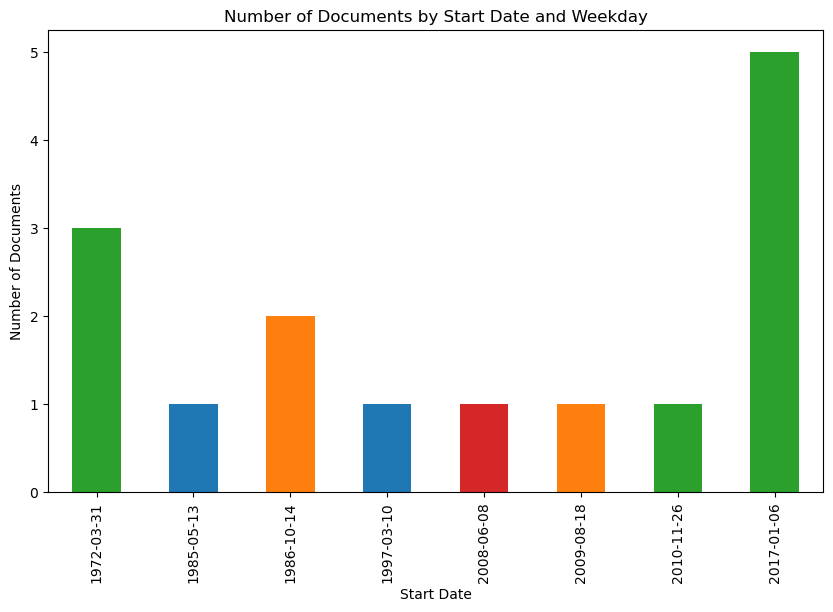

In [2]:
# test 2

# create a DataFrame from the input data
data = {'Document_ID': [7, 11, 81, 81, 81, 111, 119, 166, 166, 170, 230, 230, 252, 252, 260],
        'Location_Code': ['e', 'x', 'c', 'c', 'x', 'x', 'b', 'b', 'b', 'x', 'e', 'e', 'n', 'x', 'e'],
        'Date_in_Location_From': ['2017-01-06 23:17:22', '2017-01-06 23:17:22', '1972-03-31 09:47:22', '2017-01-06 23:17:22', '2008-06-08 12:45:38', '1986-10-14 17:53:39', '2017-01-06 23:17:22', '1985-05-13 12:19:43', '1986-10-14 17:53:39', '1997-03-10 15:24:00', '1972-03-31 09:47:22', '2010-11-26 19:22:50', '2017-01-06 23:17:22', '1972-03-31 09:47:22', '2009-08-18 03:29:08'],
        'Date_in_Locaton_To': ['2008-06-08 12:45:38', '2012-07-03 09:48:46', '1987-11-05 06:11:22', '2010-11-26 19:22:50', '1976-06-15 03:40:06', '2010-11-26 19:22:50', '1995-01-01 03:52:11', '1986-10-14 17:53:39', '2010-11-26 19:22:50', '1976-06-15 03:40:06', '1987-11-05 06:11:22', '2017-01-06 23:17:22', '1997-03-10 15:24:00', '2009-08-18 03:29:08', '1986-10-14 17:53:39']
        }
df = pd.DataFrame(data)

# convert date columns to datetime objects and create "weekday" column
df['Date_in_Location_From'] = pd.to_datetime(df['Date_in_Location_From'])
df['Date_in_Locaton_To'] = pd.to_datetime(df['Date_in_Locaton_To'])
df['weekday'] = df['Date_in_Location_From'].dt.weekday

# group by start date and weekday, count the number of documents, and unstack the weekday column
grouped = df.groupby([df['Date_in_Location_From'].dt.date, 'weekday'])['Document_ID'].count().unstack()

# create a bar chart of the grouped data
ax = grouped.plot(kind='bar', figsize=(10, 6), stacked=True, legend=False)

# set axis labels and title
ax.set_xlabel('Start Date')
ax.set_ylabel('Number of Documents')
ax.set_title('Number of Documents by Start Date and Weekday')

# sort data by descending order of total number of documents and update y-axis order accordingly
totals = grouped.sum(axis=1)
sorted_totals = totals.sort_values(ascending=False).index
ax = ax.reindex(sorted_totals)

plt.show()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the input data
data = df

# Convert date columns to pandas datetime object
data['Date_in_Location_From'] = pd.to_datetime(data['Date_in_Location_From'])
data['Weekday'] = data['Date_in_Location_From'].dt.weekday_name

# Group the data by weekday and document count
grouped_data = data.groupby('Weekday')['Document_ID'].count().reset_index(name='Document_Count')
grouped_data = grouped_data.sort_values(by='Document_Count', ascending=False)

# Plot the bar chart
plt.bar(grouped_data['Weekday'], grouped_data['Document_Count'])
plt.ylabel('Document Count')
plt.xlabel('Weekday')
plt.show()

AttributeError: 'DatetimeProperties' object has no attribute 'weekday_name'

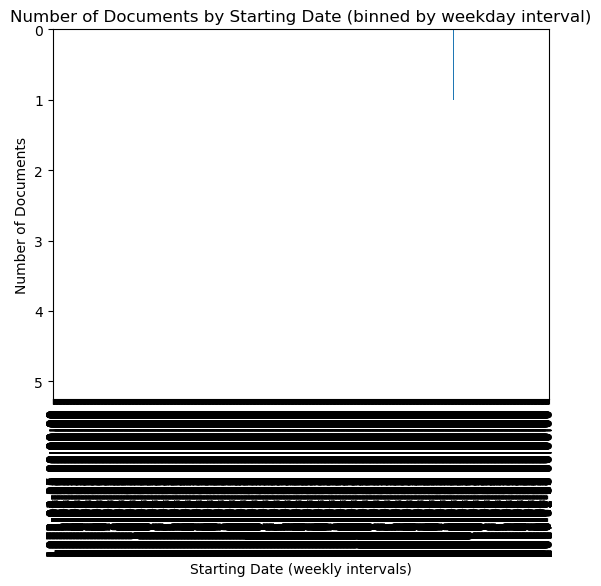

In [10]:
from datetime import datetime

# Load the dataset
data = df

# Convert Date_in_Location_From to a datetime object
data['Date_in_Location_From'] = pd.to_datetime(data['Date_in_Location_From'])

# Bin starting date by weekday interval and count the number of documents
data['weekday'] = data['Date_in_Location_From'].dt.weekday
counts = data.groupby(pd.Grouper(key='Date_in_Location_From', freq='7D'))['Document_ID'].count()

# Plot the bar chart
fig, ax = plt.subplots()
counts.plot(kind='bar', ax=ax)

# Set the axis labels and title
ax.set_xlabel('Starting Date (weekly intervals)')
ax.set_ylabel('Number of Documents')
ax.set_title('Number of Documents by Starting Date (binned by weekday interval)')

# Sort the y-axis in descending order
ax.invert_yaxis()

plt.show()

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading the data from csv

# Converting string datetime to datetime type
df['Date_in_Location_From'] = pd.to_datetime(df['Date_in_Location_From'])

# Binning starting date by weekday interval
df['Weekday'] = df['Date_in_Location_From'].dt.weekday_name
df['Weekday_Intervals'] = pd.cut(df['Date_in_Location_From'].dt.day, bins=[0,7,14,21,28,31],labels=['1st Week', '2nd Week', '3rd Week', '4th Week', "Last Week"])

# Calculating the document count for each starting day
document_count = df.groupby(['Weekday_Intervals'])['Document_ID'].count().sort_values(ascending=False)

# Creating the bar chart
plt.figure(figsize=(10,5))
plt.bar(document_count.index, document_count)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Documents')
plt.xlabel('Starting Date by Weekday Interval')
plt.title('Number of Documents in Different Starting Date Intervals')
plt.tight_layout()
plt.show()

AttributeError: 'DatetimeProperties' object has no attribute 'weekday_name'

In [1]:
p ="""Here's the code to display a pie chart for the maximum price of each film using matplotlib:

```
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'Cinema_ID': [1, 1, 1, 2, 6, 9, 10],
    'Film_ID': [1, 2, 3, 1, 5, 4, 1],
    'Date': ['21 May', '21 May', '21 Jun', '11 July', '2 Aug', '20 May', '19 May'],
    'Show_times_per_day': [5, 3, 2, 5, 4, 5, 5],
    'Price': [12.99, 12.99, 8.99, 9.99, 12.99, 9.99, 15.99]
})

max_prices = df.groupby('Film_ID')['Price'].max()
max_prices = max_prices.reset_index()

plt.pie(max_prices['Price'], labels=max_prices['Film_ID'], autopct='%1.1f%%')
plt.title('Maximum Price per Film')
plt.show()
```

This code first creates a pandas dataframe from the given input data. Then, it groups the data by the Film_ID column and calculates the maximum price for each film. It stores the resulting data in the `max_prices` variable.

Finally, the code displays a pie chart using matplotlib. The chart shows the maximum price for each film. The title of the chart is "Maximum Price per Film".

"""

In [4]:
import re
def get_clean_code(message):
        '''
        code return by chatgpt is wrapper by ```python ```
        '''
        return re.findall(r"```python\n(.*?)```", message, re.DOTALL)[0]


In [7]:
re.findall(r"```\n(.*?)```", p, re.DOTALL)

["import pandas as pd\nimport matplotlib.pyplot as plt\n\ndf = pd.DataFrame({\n    'Cinema_ID': [1, 1, 1, 2, 6, 9, 10],\n    'Film_ID': [1, 2, 3, 1, 5, 4, 1],\n    'Date': ['21 May', '21 May', '21 Jun', '11 July', '2 Aug', '20 May', '19 May'],\n    'Show_times_per_day': [5, 3, 2, 5, 4, 5, 5],\n    'Price': [12.99, 12.99, 8.99, 9.99, 12.99, 9.99, 15.99]\n})\n\nmax_prices = df.groupby('Film_ID')['Price'].max()\nmax_prices = max_prices.reset_index()\n\nplt.pie(max_prices['Price'], labels=max_prices['Film_ID'], autopct='%1.1f%%')\nplt.title('Maximum Price per Film')\nplt.show()\n"]